Comenzamos importando las funciones creadas para tener nuestra X y nuestra y.

In [14]:
from Fun_to_prepare_data import * 
from sklearn.model_selection import train_test_split
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf

Definimos nuestra X y nuestra y.

In [2]:
paths={1:"../imputs/oranges_dataset/oranges_pictures/",
      0:"../imputs/oranges_dataset/random_pictures/"}
images={}
for clas,path in paths.items():
    images[clas]=[]
    for im in listdir(path):
        if im.endswith("jpg") or im.endswith("png"):
            a=resize_image(path+im,(64,64))
            images[clas].append(np.asarray(a))
    images[clas]=np.array(images[clas])

In [3]:
X= np.concatenate(list(images.values()),axis=0)

In [4]:
y = np.concatenate([[k]* v.shape[0] for k,v in images.items()])

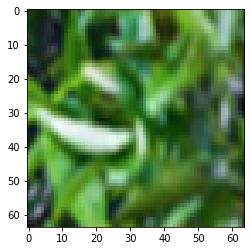

In [5]:
plt.imshow(X[521])

Realizamos un split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train[1]

array([[[234, 235, 238],
        [231, 234, 240],
        [227, 234, 242],
        ...,
        [206, 222, 183],
        [207, 223, 184],
        [205, 222, 184]],

       [[231, 235, 239],
        [229, 234, 240],
        [226, 234, 240],
        ...,
        [209, 225, 188],
        [211, 228, 191],
        [209, 226, 190]],

       [[233, 239, 245],
        [232, 238, 245],
        [231, 238, 244],
        ...,
        [209, 227, 190],
        [212, 230, 194],
        [211, 229, 193]],

       ...,

       [[246, 124,  36],
        [245, 126,  36],
        [246, 128,  38],
        ...,
        [ 61,  65,  20],
        [ 68,  70,  29],
        [ 76,  75,  39]],

       [[245, 119,  35],
        [245, 121,  36],
        [248, 125,  38],
        ...,
        [ 74,  74,  33],
        [ 84,  83,  45],
        [ 93,  90,  57]],

       [[246, 118,  36],
        [246, 119,  36],
        [247, 121,  37],
        ...,
        [ 87,  86,  50],
        [ 96,  93,  61],
        [102,  97,  68]]

In [16]:
img_width, img_height = 64, 64
img_rows, img_cols = 64, 64

# Prepare data to feed the NN
num_classes = 2

# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_width, img_height)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_width, img_height, 3)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)
#X_train = X_train.astype('float32') / 255
#X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (750, 64, 64, 3)
750 train samples
188 test samples


In [17]:
X_train[1]

array([[[0.17864928, 0.20557742, 0.255756  ],
        [0.17853703, 0.2090346 , 0.27319282],
        [0.1782873 , 0.21645196, 0.29938456],
        ...,
        [0.14219885, 0.14949998, 0.12968846],
        [0.14251946, 0.149899  , 0.12998413],
        [0.14058334, 0.14862734, 0.12941015]],

       [[0.1763589 , 0.20557742, 0.2568306 ],
        [0.17699125, 0.2090346 , 0.27319282],
        [0.1775019 , 0.21645196, 0.29691032],
        ...,
        [0.1442697 , 0.15152025, 0.13323185],
        [0.14527346, 0.15325996, 0.13492918],
        [0.14332643, 0.15130532, 0.13363004]],

       [[0.17788582, 0.20907661, 0.26327822],
        [0.1793099 , 0.21260785, 0.27888435],
        [0.18142892, 0.22015199, 0.3018588 ],
        ...,
        [0.1442697 , 0.15286711, 0.1346492 ],
        [0.14596197, 0.15460436, 0.13704848],
        [0.14469798, 0.1533138 , 0.13573998]],

       ...,

       [[0.18781078, 0.1084749 , 0.03868578],
        [0.18935744, 0.1125571 , 0.04097892],
        [0.19321004, 0

In [18]:
img_width, img_height = 64, 64

model = tf.keras.model.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [20]:
print(X_train.shape)
print(y_train.shape)

(750, 64, 64, 3)
(750, 2, 2)


In [21]:
batch_size = 100
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:532 train_step  **
        loss = self.compiled_loss(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1595 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4692 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:171 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 1) vs (None, 2, 2))
